In [1]:
import pickle
import random
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt
import random
from PIL import Image
import  cv2
from imblearn.over_sampling import SMOTE
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input

import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications import ResNet50
from sklearn.metrics.pairwise import cosine_similarity

import pandas as pd
from numpy import trapz

from tensorflow.keras.applications.resnet50 import ResNet50
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.optimizers import Adam
import keras

from keras.layers import Input,Conv2D,Activation,Dense,Lambda,Flatten,Embedding,PReLU,BatchNormalization
from keras.models import Model
import keras.backend as K
from keras.utils import to_categorical
import numpy as np
from keras.callbacks import EarlyStopping

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [34]:
with open('/content/drive/MyDrive/resized_test_data.pickle', 'rb') as f:
    x_test, y_test = pickle.load(f)

In [44]:
indices_1 =np.random.choice(np.where(y_test == 1)[0],size=1000)
indices_0 =np.random.choice( np.where(y_test == 0)[0],size=1000)
inc=np.concatenate([indices_1,indices_0])
# print(inc)

imgs=x_test[inc]
labels=y_test[inc]

print(imgs.shape,labels.shape)
print(labels)

(2000, 2, 72, 72, 3) (2000,)
[1 1 1 ... 0 0 0]


In [35]:
imgs=x_test.copy()
labels=y_test.copy()

<h2>Functions</h2>

In [ ]:
def loadmodel(imgs):
  model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, pooling='avg')

  def extract_features(img):
      x = tf.keras.preprocessing.image.img_to_array(img)
      x = tf.expand_dims(x, axis=0)
      x = tf.keras.applications.resnet50.preprocess_input(x)
      features = model.predict(x)
      print(features.shape)
      return features


  similarities = np.zeros(len(imgs))
  for i in range(len(imgs)):
      features1 = extract_features(imgs[i][0])
      features2 = extract_features(imgs[i][1])
      similarity = cosine_similarity(features1, features2)
      similarities[i] = similarity[0, 0]
      print(i)

  print(similarities)
  np.save('/content/drive/MyDrive/similarities.npy', similarities)
  similarities1 = np.load('/content/drive/MyDrive/similarities.npy')
  return similarities


In [ ]:
similarities=loadmodel(imgs)

Streaming output truncated to the last 5000 lines.
(1, 2048)
1/1 [==============================] - 0s 44ms/step
(1, 2048)
10275
1/1 [==============================] - 0s 51ms/step
(1, 2048)
1/1 [==============================] - 0s 75ms/step
(1, 2048)
10276
1/1 [==============================] - 0s 76ms/step
(1, 2048)
1/1 [==============================] - 0s 67ms/step
(1, 2048)
10277
1/1 [==============================] - 0s 62ms/step
(1, 2048)
1/1 [==============================] - 0s 61ms/step
(1, 2048)
10278
1/1 [==============================] - 0s 55ms/step
(1, 2048)
1/1 [==============================] - 0s 71ms/step
(1, 2048)
10279
1/1 [==============================] - 0s 58ms/step
(1, 2048)
1/1 [==============================] - 0s 62ms/step
(1, 2048)
10280
1/1 [==============================] - 0s 73ms/step
(1, 2048)
1/1 [==============================] - 0s 56ms/step
(1, 2048)
10281
1/1 [==============================] - 0s 62ms/step
(1, 2048)
1/1 [========================

<h2>AUC-ROC</h2>

In [ ]:
def findAUCROC(similarities,labels):
  thresholds=np.array(list(map(lambda x: x / 100, range(0, 100, 1))))
  print(thresholds)
  roc_point=[]
  for threshold in thresholds:
    tp=0;fp=0;fn=0;tn=0;
    for i in range(len(similarities)):
      actual=labels[i]
      if similarities[i]>=threshold:
        prediction_class=1
      else:
        prediction_class=0
      if actual==1 and prediction_class==1:
        tp+=1
      elif actual==1 and prediction_class==0:
        fn+=1
      elif actual==0 and prediction_class==1:
        fp+=1
      elif actual==0 and prediction_class==0:
        tn+=1
    print(tp,fp,fn,tn)
    tpr=tp/(tp+fn)
    fpr=fp/(tn+fp)
    print(tpr,fpr)
    roc_point.append([tpr,fpr])
  pivot_test=pd.DataFrame(roc_point,columns=['x','y'])
  pivot_test['threshold']=thresholds
  plt.scatter(pivot_test.y,pivot_test.x)
  plt.xlabel('false positive rate')
  plt.ylabel('true positive rate')
  AUC_testresnet50=np.abs(np.trapz(pivot_test.x,pivot_test.y))
  print(AUC_testresnet50)
  return AUC_testresnet50



[0.5019694  0.24160306 0.46746421 ... 0.70084298 0.76809871 0.6919719 ]
[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]
5500 5775 0 0
1.0 1.0
5500 5775 0 0
1.0 1.0
5500 5775 0 0
1.0 1.0
5500 5775 0 0
1.0 1.0
5500 5775 0 0
1.0 1.0
5500 5775 0 0
1.0 1.0
5500 5775 0 0
1.0 1.0
5500 5775 0 0
1.0 1.0
5500 5775 0 0
1.0 1.0
5500 5775 0 0
1.0 1.0
5500 5775 0 0
1.0 1.0
5500 5775 0 0
1.0 1.0
5498 5774 2 1
0.9996363636363637 0.9998268398268398
5498 5774 2 1
0.9996363636363637 0.9998268398268398
5498 5773 2 2
0.9996363636363637 0.9996536796536797

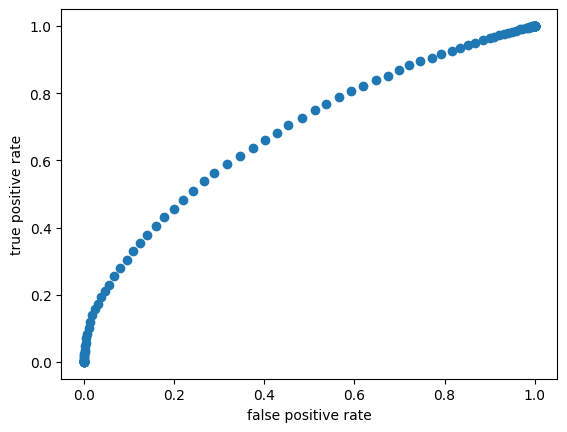

In [ ]:
print(similarities)
print(findAUCROC(similarities,labels))

<h2>ResnetPretrain</h2>

In [13]:
with open('/content/drive/MyDrive/resized_train_data.pickle', 'rb') as f:
    x_train, y_train = pickle.load(f)

In [14]:
with open('/content/drive/MyDrive/resized_valid_data.pickle', 'rb') as f:
    x_valid, y_valid = pickle.load(f)

In [7]:
print(y_train.dtype,y_valid.dtype,x_train.dtype,x_valid.dtype)

int64 int64 uint8 uint8


In [15]:
# x_train=x_train.astype("float32")
# x_valid=x_valid.astype("float32")
# x_train/=255.
# x_valid/=255.
# x_train=np.expand_dims(x_train,axis=-1)
# x_valid=np.expand_dims(x_valid,axis=-1)

y_train_one_hot=to_categorical(y_train)
y_valid_one_hot=to_categorical(y_valid)

print(x_train.shape)
print(y_train.shape)
print(y_valid_one_hot.shape)

(14569, 72, 72, 3)
(14569,)
(5440, 80)


In [16]:
indices = np.arange(len(y_train))
np.random.shuffle(indices)
x_train = x_train[indices]
y_train_one_hot = y_train_one_hot[indices]
y_train = y_train[indices]

In [10]:
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [17]:
indices = np.arange(len(y_valid))
np.random.shuffle(indices)
x_valid= x_valid[indices]
y_valid_one_hot = y_valid_one_hot[indices]
y_valid= y_valid[indices]

In [12]:
x_train = x_train.astype('float32')
x_valid = x_valid.astype('float32')
x_train /= 255
x_valid /= 255

In [23]:
from tensorflow.keras.losses import CategoricalCrossentropy

num_classes = 80
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(72, 72, 3))

base_model.trainable = False
x = base_model.output
out1 = GlobalAveragePooling2D()(x)
print(out1 .shape[1])
out2 = Dense(num_classes, activation='softmax')(out1)
model = Model(inputs=base_model.input, outputs=out2)


lambda_c=1
input_=Input(shape=(1,))
centers=Embedding(num_classes,out1 .shape[1])(input_)
intra_loss=Lambda(lambda x:K.mean(K.square(x[0]-x[1][:,0]),1,keepdims=True))([out1,centers])
model_center_loss=Model([base_model.input,input_],[out2,intra_loss])
model_center_loss.compile(optimizer="adam",
                          loss=["categorical_crossentropy",lambda y_true,y_pred:y_pred],
                          loss_weights=[1,lambda_c/2.],
                          metrics=["acc"])
model_center_loss.summary()

2048
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 72, 72, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 78, 78, 3)    0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 36, 36, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 36, 36, 64)   256         ['conv1_conv[0][0]']             
                                                                                       

In [24]:
dummy_matrix1=np.zeros((x_train.shape[0],1))
dummy_matrix2=np.zeros((x_valid.shape[0],1))

model_center_loss.fit(x=[x_train,y_train],y=[y_train_one_hot,dummy_matrix1],
                     batch_size=16,epochs=10,verbose=1,validation_data=([x_valid,y_valid],[y_valid_one_hot,dummy_matrix2]),
                     callbacks=[EarlyStopping(monitor="val_loss",patience=20)])

Epoch 1/10
911/911 [==============================] - 26s 24ms/step - loss: 2.2866 - dense_1_loss: 1.2462 - lambda_1_loss: 2.0808 - dense_1_acc: 0.6852 - lambda_1_acc: 0.0037 - val_loss: 1.6681 - val_dense_1_loss: 0.6841 - val_lambda_1_loss: 1.9681 - val_dense_1_acc: 0.8007 - val_lambda_1_acc: 0.0037
Epoch 2/10
911/911 [==============================] - 20s 22ms/step - loss: 1.3119 - dense_1_loss: 0.3670 - lambda_1_loss: 1.8899 - dense_1_acc: 0.8933 - lambda_1_acc: 0.0066 - val_loss: 1.4143 - val_dense_1_loss: 0.5131 - val_lambda_1_loss: 1.8024 - val_dense_1_acc: 0.8506 - val_lambda_1_acc: 0.0063
Epoch 3/10
911/911 [==============================] - 21s 23ms/step - loss: 1.0750 - dense_1_loss: 0.2044 - lambda_1_loss: 1.7412 - dense_1_acc: 0.9417 - lambda_1_acc: 0.0104 - val_loss: 1.2656 - val_dense_1_loss: 0.4305 - val_lambda_1_loss: 1.6701 - val_dense_1_acc: 0.8768 - val_lambda_1_acc: 0.0119
Epoch 4/10
911/911 [==============================] - 18s 20ms/step - loss: 0.9382 - dense_1_l

In [25]:
base_model.trainable = True
model_center_loss.summary()

model_center_loss.compile(keras.optimizers.Adam(1e-5),
                          loss=["categorical_crossentropy",lambda y_true,y_pred:y_pred],
                          loss_weights=[1,lambda_c/2.],
                          metrics=["acc"])


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 72, 72, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 78, 78, 3)    0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 36, 36, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 36, 36, 64)   256         ['conv1_conv[0][0]']             
                                                                                            

In [26]:
dummy_matrix1=np.zeros((x_train.shape[0],1))
dummy_matrix2=np.zeros((x_valid.shape[0],1))

model_center_loss.fit(x=[x_train,y_train],y=[y_train_one_hot,dummy_matrix1],
                     batch_size=16,epochs=20,verbose=1,validation_data=([x_valid,y_valid],[y_valid_one_hot,dummy_matrix2]),
                     callbacks=[EarlyStopping(monitor="val_loss",patience=20)])

Epoch 1/20
911/911 [==============================] - 57s 55ms/step - loss: 2.6654 - dense_1_loss: 2.3192 - lambda_1_loss: 0.6924 - dense_1_acc: 0.6018 - lambda_1_acc: 0.2235 - val_loss: 2.5146 - val_dense_1_loss: 1.7864 - val_lambda_1_loss: 1.4563 - val_dense_1_acc: 0.7531 - val_lambda_1_acc: 0.1965
Epoch 2/20
911/911 [==============================] - 48s 53ms/step - loss: 0.8797 - dense_1_loss: 0.5936 - lambda_1_loss: 0.5722 - dense_1_acc: 0.8377 - lambda_1_acc: 0.4140 - val_loss: 1.2483 - val_dense_1_loss: 0.8165 - val_lambda_1_loss: 0.8636 - val_dense_1_acc: 0.8415 - val_lambda_1_acc: 0.2662
Epoch 3/20
911/911 [==============================] - 48s 53ms/step - loss: 0.5502 - dense_1_loss: 0.2981 - lambda_1_loss: 0.5043 - dense_1_acc: 0.9106 - lambda_1_acc: 0.5497 - val_loss: 0.7918 - val_dense_1_loss: 0.4567 - val_lambda_1_loss: 0.6702 - val_dense_1_acc: 0.8864 - val_lambda_1_acc: 0.3504
Epoch 4/20
911/911 [==============================] - 47s 52ms/step - loss: 0.3980 - dense_1_l

In [30]:
func=K.function([base_model.input],[model.layers[-2].output])
test_features= func([x_valid])[0]
print(test_features.shape)

test_centers=np.dot(np.transpose(y_valid_one_hot),test_features)
test_centers_count=np.sum(np.transpose(y_valid_one_hot),axis=1,keepdims=True)
test_centers/=test_centers_count
print(test_centers.shape)

(5440, 2048)
(80, 2048)


In [31]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
tsne_vectors = tsne.fit_transform(test_features)
tsne_centers=  tsne.fit_transform(test_centers)

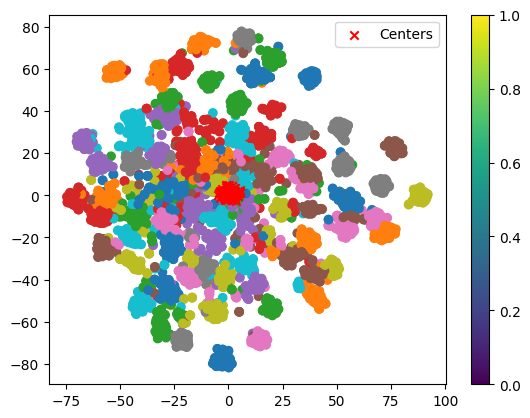

In [32]:
import matplotlib.pyplot as plt

plt.scatter(tsne_vectors[:, 0], tsne_vectors[:, 1], c=y_valid, cmap='tab10')
plt.scatter(tsne_centers[:, 0], tsne_centers[:, 1], c='red', marker='x', label='Centers')
plt.colorbar()
plt.legend()
plt.show()

In [33]:
model_center_loss.save('/content/drive/MyDrive/trained_model_centerloss2.h5')

In [ ]:

# Load the model
model1 = tf.keras.models.load_model('/content/drive/MyDrive/trained_model_centerloss2.h5')

ValueError: ignored

In [ ]:
# from sklearn.metrics import accuracy_score

# y_pred = model.predict(x_valid)

# y_pred_labels = np.argmax(y_pred, axis=1)
# y_true_labels = np.argmax(y_valid)

# # محاسبه دقت
# accuracy = accuracy_score(y_true_labels, y_pred_labels)
# print(f"accuracy {accuracy}")

loss, accuracy = model.evaluate(x_valid,  y_valid_one_hot)

170/170 [==============================] - 5s 20ms/step - loss: 0.4607 - accuracy: 0.8847


In [ ]:
print(imgs.shape)

(200, 2, 72, 72, 3)


In [45]:
def extract_features(img):
    x = tf.keras.preprocessing.image.img_to_array(img)
    x = tf.expand_dims(x, axis=0)
    x = tf.keras.applications.resnet50.preprocess_input(x)
    out1 = model.layers[-2].output
    features = tf.keras.Model(inputs=model.input, outputs=out1).predict(x)
    print(features.shape)
    return features


similarities = np.zeros(len(imgs))
for i in range(len(imgs)):
    features1 = extract_features(imgs[i][0])
    features2 = extract_features(imgs[i][1])
    similarity = cosine_similarity(features1, features2)
    similarities[i] = similarity[0, 0]
    print(i)

print(similarities)

Streaming output truncated to the last 5000 lines.
(1, 2048)
1/1 [==============================] - 1s 1s/step
(1, 2048)
1000
1/1 [==============================] - 1s 1s/step
(1, 2048)
1/1 [==============================] - 2s 2s/step
(1, 2048)
1001
1/1 [==============================] - 1s 1s/step
(1, 2048)
1/1 [==============================] - 1s 979ms/step
(1, 2048)
1002
1/1 [==============================] - 1s 954ms/step
(1, 2048)
1/1 [==============================] - 1s 940ms/step
(1, 2048)
1003
1/1 [==============================] - 1s 910ms/step
(1, 2048)
1/1 [==============================] - 1s 897ms/step
(1, 2048)
1004
1/1 [==============================] - 1s 884ms/step
(1, 2048)
1/1 [==============================] - 3s 3s/step
(1, 2048)
1005
1/1 [==============================] - 2s 2s/step
(1, 2048)
1/1 [==============================] - 2s 2s/step
(1, 2048)
1006
1/1 [==============================] - 1s 1s/step
(1, 2048)
1/1 [==============================] - 1s 1s/s

In [46]:
thresholds=np.array(list(map(lambda x: x / 100, range(0, 100, 1))))
print(thresholds)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]


In [47]:
roc_point=[]
for threshold in thresholds:
  tp=0;fp=0;fn=0;tn=0;
  for i in range(len(similarities)):
    actual=labels[i]
    if similarities[i]>=threshold:
      prediction_class=1
    else:
      prediction_class=0
    if actual==1 and prediction_class==1:
      tp+=1
    elif actual==1 and prediction_class==0:
      fn+=1
    elif actual==0 and prediction_class==1:
      fp+=1
    elif actual==0 and prediction_class==0:
      tn+=1
  print(tp,fp,fn,tn)
  tpr=tp/(tp+fn)
  fpr=fp/(tn+fp)
  print(tpr,fpr)
  roc_point.append([tpr,fpr])

1000 1000 0 0
1.0 1.0
1000 1000 0 0
1.0 1.0
1000 1000 0 0
1.0 1.0
1000 1000 0 0
1.0 1.0
1000 1000 0 0
1.0 1.0
1000 1000 0 0
1.0 1.0
1000 1000 0 0
1.0 1.0
1000 1000 0 0
1.0 1.0
1000 1000 0 0
1.0 1.0
1000 1000 0 0
1.0 1.0
1000 1000 0 0
1.0 1.0
1000 1000 0 0
1.0 1.0
1000 1000 0 0
1.0 1.0
1000 1000 0 0
1.0 1.0
1000 1000 0 0
1.0 1.0
1000 1000 0 0
1.0 1.0
1000 1000 0 0
1.0 1.0
1000 1000 0 0
1.0 1.0
1000 1000 0 0
1.0 1.0
1000 1000 0 0
1.0 1.0
1000 1000 0 0
1.0 1.0
1000 1000 0 0
1.0 1.0
1000 1000 0 0
1.0 1.0
1000 1000 0 0
1.0 1.0
1000 1000 0 0
1.0 1.0
1000 1000 0 0
1.0 1.0
1000 1000 0 0
1.0 1.0
1000 1000 0 0
1.0 1.0
1000 1000 0 0
1.0 1.0
1000 1000 0 0
1.0 1.0
1000 1000 0 0
1.0 1.0
1000 1000 0 0
1.0 1.0
1000 1000 0 0
1.0 1.0
1000 1000 0 0
1.0 1.0
1000 1000 0 0
1.0 1.0
1000 1000 0 0
1.0 1.0
1000 999 0 1
1.0 0.999
1000 999 0 1
1.0 0.999
1000 999 0 1
1.0 0.999
1000 999 0 1
1.0 0.999
999 999 1 1
0.999 0.999
999 999 1 1
0.999 0.999
999 999 1 1
0.999 0.999
998 998 2 2
0.998 0.998
998 998 2 2
0.998 0.

In [48]:
pivot_test=pd.DataFrame(roc_point,columns=['x','y'])
pivot_test['threshold']=thresholds

Text(0, 0.5, 'true positive rate')

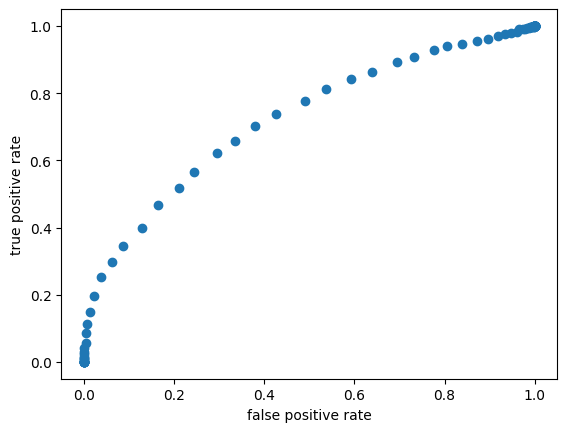

In [49]:
plt.scatter(pivot_test.y,pivot_test.x)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')

In [50]:
AUC_testresnet50=np.abs(np.trapz(pivot_test.x,pivot_test.y))

print(AUC_testresnet50)

0.72163
